In [31]:
from utils_martina.my_utils import *

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import Rbeast as rb

### Info

In [32]:
# patient_id = "chb04"
# record_id = "28"

patient_id = "PN00"
record_id = "5"

In [33]:
index_evaluator = 2

In [ ]:
data_edges_path = "..\\..\\explainability\GRETEL-repo\\output\\metrics\\data_edges\\"
eval_manager_path = "..\\..\\explainability\GRETEL-repo\\output\\eval_manager\\"
output_path = "..\\..\\explainability\GRETEL-repo\\output\\metrics\\"

In [35]:
file_name = get_most_recent_file(eval_manager_path).split('.')[0]
file_name

'28604-Martina'

### Load data

In [ ]:
# Load data
with open(eval_manager_path + file_name + '.pkl', 'rb') as f:
    eval_manager = pickle.load(f)

print(f"{(eval_manager._evaluators[index_evaluator]._explainer.name).split('-')[0]} explainer")

with open(f"{data_edges_path}{file_name.split('-')[0]}-{patient_id}_{record_id}_{(eval_manager._evaluators[index_evaluator]._explainer.name).split('-')[0]}.pkl", 'rb') as f:
    loaded_variables = pickle.load(f)

times_test = loaded_variables['times_test']
modified_edges = loaded_variables['modified_edges']

DCESExplainer explainer


In [37]:
# Test
# t = pd.Series([0.1, 0.5, 1.0, 1.8, 2.4, 3.1, 4.2, 5.3, 6.5, 7.7, 8.0, 9.1, 
#               10.0, 11.3, 12.5, 13.7, 14.8, 16.0, 17.2, 18.3, 19.0, 20.0, 
#               21.5, 22.6, 23.0, 24.5, 25.0, 26.5, 28.0, 29.5, 31.0, 33.0, 
#               35.5, 37.0, 39.0, 41.0, 43.0, 45.0, 47.0, 50.0, 53.0, 56.0, 
#               59.0, 62.0, 65.0, 68.0, 71.0, 75.0, 78.0, 80.0, 83.0, 87.5])

# y = pd.Series([5, 6, 7, 8, 10, 13, 16, 18, 20, 22, 21, 19, 16, 14, 10, 7, 
#               5, 3, 2, 4, 7, 11, 16, 20, 25, 30, 35, 40, 38, 36, 35, 34, 
#               33, 32, 30, 28, 27, 25, 24, 23, 22, 22, 24, 26, 29, 32, 34, 
#               35, 37, 40, 42, 44])

# Series
t = pd.Series(times_test)
y = pd.Series(modified_edges)

### BEAST method

In [38]:
beast_fit = rb.beast_irreg(y, t, season='none', quiet=1)

# grafico = rb.plot(beast_fit)
# plt.show()

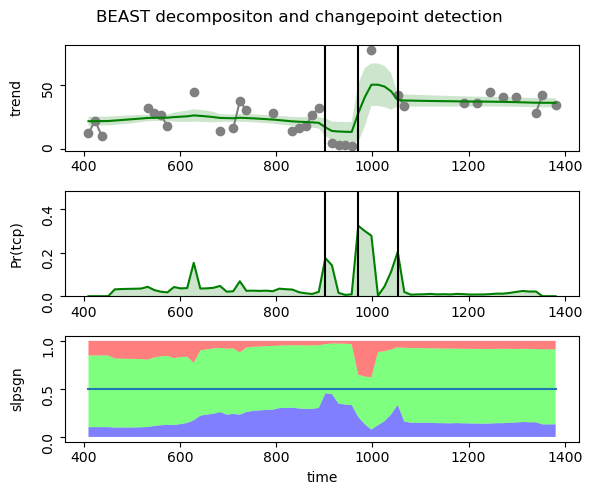

In [39]:
def my_plot(beast_fit,remove_lines=False):
    fig, axes = plt.subplots(3, 1, figsize=(6,5))

    grafico = rb.plot(beast_fit, vars=['t', 'tcp', 'slpsgn'], fig=fig)

    grafico[1][0].set_xlabel('')
    grafico[1][1].set_xlabel('')
    grafico[1][1].yaxis.tick_left()

    if remove_lines:
        for ax in [grafico[1][0], grafico[1][1]]:
            for line in ax.lines:
                if isinstance(line, plt.Line2D) and line.get_color() == 'k':
                    line.remove()

    plt.subplots_adjust(hspace=0.5)
    plt.savefig(f"{output_path}{file_name.split('-')[0]}-{patient_id}_{record_id}_{(eval_manager._evaluators[index_evaluator]._explainer.name).split('-')[0]}-POINTS.png", dpi=300)
    plt.tight_layout()
    plt.show()

my_plot(beast_fit)

In [40]:
# beast_fit_regular = rb.beast(y, season='none')
# rb.plot(beast_fit_regular)